# US Treasury Bonds Stock Data

In [122]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import missingno as msno
import autoreload
import csv
import warnings
import os
import sys

from collections import defaultdict, Counter

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 1000)

sb.set()
sb.set_style('darkgrid')

plt.style.use('fivethirtyeight')
plt.tight_layout()

%matplotlib inline
%reload_ext autoreload
%autoreload 2

warnings.filterwarnings('ignore')

In [123]:
df = pd.read_csv(r"D:\Open Classroom\Datasets\22 Years of US Treasury Bonds Data\Treasury Yield 30 Years.csv")
df.head()

,Date,High,Low,Open,Close,Adj Close
0,1/2/2001,5.433,5.342,5.433,5.350,5.350
1,1/3/2001,5.477,5.307,5.328,5.463,5.463
2,1/4/2001,5.513,5.431,5.503,5.435,5.435
3,1/5/2001,5.471,5.414,5.425,5.414,5.414
4,1/8/2001,5.427,5.392,5.427,5.408,5.408


In [124]:
df.shape

(5493, 6)

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5493 entries, 0 to 5492
Data columns (total 6 columns):
Date         5493 non-null object
High         5493 non-null float64
Low          5493 non-null float64
Open         5493 non-null float64
Close        5493 non-null float64
Adj Close    5493 non-null float64
dtypes: float64(5), object(1)
memory usage: 257.6+ KB


In [126]:
round(df.describe(),2)

,High,Low,Open,Close,Adj Close
count,5493.00,5493.00,5493.00,5493.00,5493.00
mean,3.76,3.69,3.72,3.72,3.72
std,1.14,1.14,1.14,1.14,1.14
min,1.03,0.84,0.91,0.94,0.94
25%,2.91,2.86,2.89,2.88,2.88
50%,3.70,3.63,3.66,3.66,3.66
75%,4.74,4.68,4.71,4.71,4.71
max,5.90,5.84,5.86,5.89,5.89


In [127]:
df.isnull().sum()

Date         0
High         0
Low          0
Open         0
Close        0
Adj Close    0
dtype: int64

In [128]:
df['Date'] = pd.to_datetime(df['Date'])

In [129]:
df['Day'] = df['Date'].dt.day_name()

In [130]:
df['Month'] = df['Date'].dt.month_name()

In [131]:
df.head()

,Date,High,Low,Open,Close,Adj Close,Day,Month
0,2001-01-02,5.433,5.342,5.433,5.350,5.350,Tuesday,January
1,2001-01-03,5.477,5.307,5.328,5.463,5.463,Wednesday,January
2,2001-01-04,5.513,5.431,5.503,5.435,5.435,Thursday,January
3,2001-01-05,5.471,5.414,5.425,5.414,5.414,Friday,January
4,2001-01-08,5.427,5.392,5.427,5.408,5.408,Monday,January


In [132]:
df.set_index(df['Date'], inplace = True)
df.drop(columns = ['Date'], inplace = True)

In [133]:
df.head()

,High,Low,Open,Close,Adj Close,Day,Month
Date,,,,,,,
2001-01-02,5.433,5.342,5.433,5.350,5.350,Tuesday,January
2001-01-03,5.477,5.307,5.328,5.463,5.463,Wednesday,January
2001-01-04,5.513,5.431,5.503,5.435,5.435,Thursday,January
2001-01-05,5.471,5.414,5.425,5.414,5.414,Friday,January
2001-01-08,5.427,5.392,5.427,5.408,5.408,Monday,January


Text(0.5, 1.0, 'High Stocks Based on Monthly Trade')

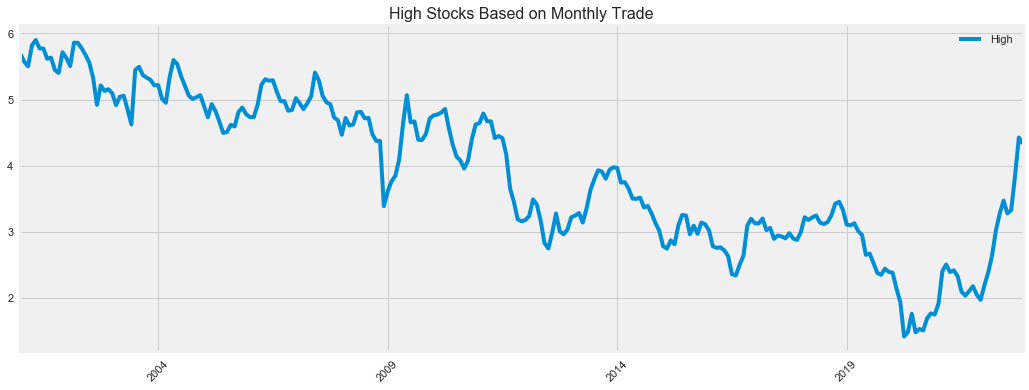

In [134]:
plt.figure(figsize = (16, 6))
monthly_high = df['High'].resample('M').max()
monthly_high.plot(kind = 'line', label='High')
plt.legend(loc = 'best')
plt.xlabel(None)
plt.xticks(rotation = 45)
plt.title('High Stocks Based on Monthly Trade', fontdict = {'size': 16})

Text(0.5, 1.0, 'Best Month for Stcok Trade in teh US Treasury Bond')

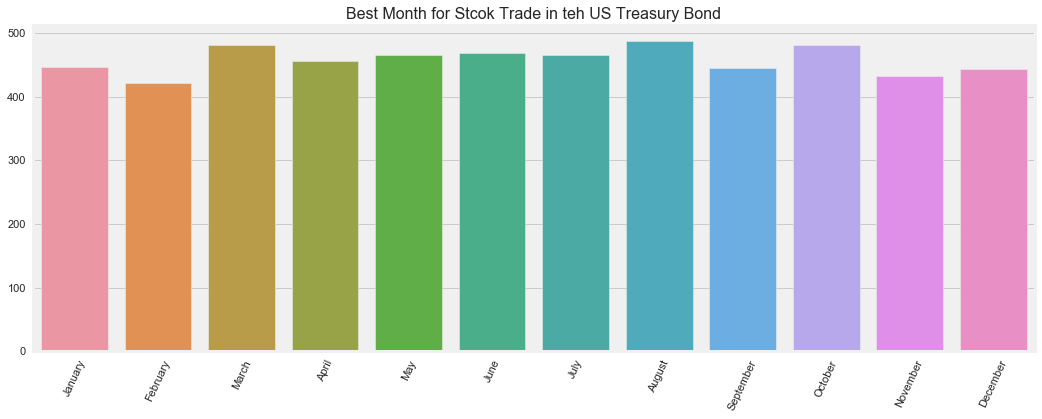

In [135]:
plt.figure(figsize = (16, 6))
sb.countplot(df['Month'])
plt.xlabel(None)
plt.ylabel(None)
plt.xticks(rotation = 65)
plt.title('Best Month for Stcok Trade in teh US Treasury Bond', fontdict = {'size': 16})

Text(0.5, 1.0, 'Best Day for Stcok Trade in teh US Treasury Bond')

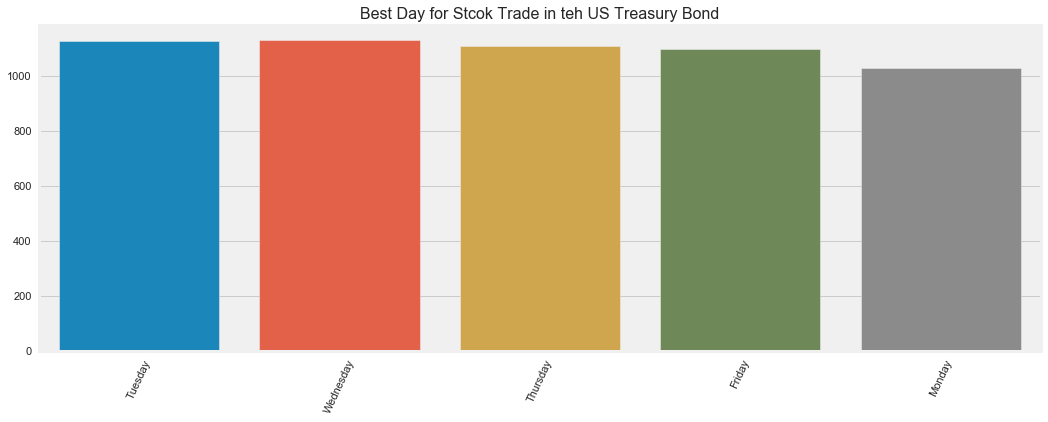

In [136]:
plt.figure(figsize = (16, 6))
sb.countplot(df['Day'])
plt.xlabel(None)
plt.ylabel(None)
plt.xticks(rotation = 65)
plt.title('Best Day for Stcok Trade in teh US Treasury Bond', fontdict = {'size': 16})

In [137]:
df.head()

,High,Low,Open,Close,Adj Close,Day,Month
Date,,,,,,,
2001-01-02,5.433,5.342,5.433,5.350,5.350,Tuesday,January
2001-01-03,5.477,5.307,5.328,5.463,5.463,Wednesday,January
2001-01-04,5.513,5.431,5.503,5.435,5.435,Thursday,January
2001-01-05,5.471,5.414,5.425,5.414,5.414,Friday,January
2001-01-08,5.427,5.392,5.427,5.408,5.408,Monday,January


Text(0.5, 1.0, 'High Stocks Based on Daily Trade')

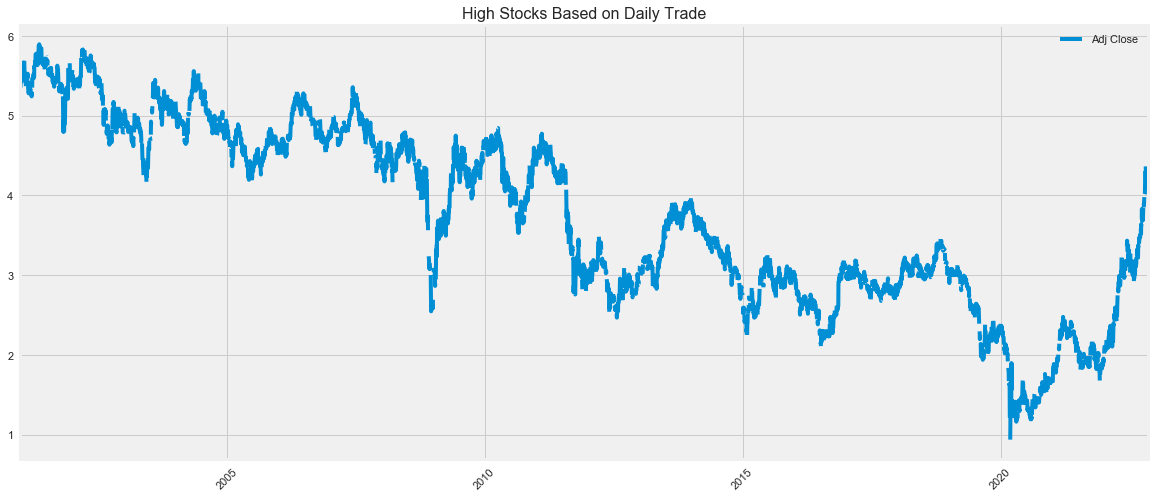

In [138]:
plt.figure(figsize = (18, 8))
monthly_high = df['Adj Close'].resample('d').max()
monthly_high.plot(kind = 'line', label='Adj Close')
plt.legend(loc = 'best')
plt.xlabel(None)
plt.xticks(rotation = 45)
plt.title('High Stocks Based on Daily Trade', fontdict = {'size': 16})